### RNN을 이용한 텍스트 분류(Text classification using PyTorch) ###


# 훈련 데이터에 대한 이해

앞으로 배우게 될 텍스트 분류 작업은 지도 학습(Supervised Learning)에 속합니다. 지도 학습의 훈련 데이터는 레이블이라는 이름의 미리 정답이 적혀있는 데이터로 구성되어 있습니다. 쉽게 비유하면, 기계는 정답이 적혀져 있는 문제지를 열심히 공부하고, 향후에 정답이 없는 문제에 대해서도 정답을 예측해서 대답하게 되는 메커니즘입니다.

예를 들어 스팸 메일 분류기의 훈련 데이터같은 경우에는 메일의 내용과 해당 메일이 정상 메일인지, 스팸 메일인지 적혀있는 레이블로 구성되어져 있습니다. 아래와 같은 형식의 메일 샘플이 약 20,000개 있다고 가정해봅시다.

텍스트(메일의 내용)	          | 레이블(스팸 여부)
                          |
당신에게 드리는 마지막 혜택! ...|	스팸 메일

내일 뵐 수 있을지 확인 부탁...	|정상 메일

쉿! 혼자 보세요...	           | 스팸 메일

언제까지 답장 가능할...	       | 정상 메일

...	                        |  ...

(광고) 멋있어질 수 있는...	    |스팸 메일

20,000개의 메일 샘플을 가진 이 데이터는 메일의 내용을 담고 있는 텍스트 데이터와 이 데이터가 스팸 메일인지 아닌지가 적혀있는 레이블. 두 가지 열로 이루어져있습니다. 기계는 이 20,000개의 메일 샘플 데이터를 학습하게 되는데, 만약 데이터가 깔끔하고 모델 또한 잘 설계되어져 있다면 학습이 다 된 이 모델은 훈련 데이터에서는 없었던 어떤 메일 텍스트가 주어졌을 때 레이블을 예측하게 됩니다.
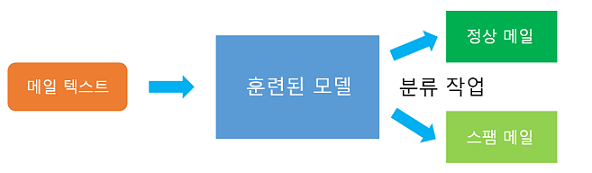


# 훈련 데이터와 테스트 데이터
위에서는 20,000개의 메일 샘플을 전부 훈련에 사용한다고 했지만 사실 갖고있는 전체 데이터를 전부 훈련에 사용하는 것 보다는 테스트용으로 일부는 남겨놓는 것으로 바람직합니다. 예를 들어서 20,000개의 샘플 중에서 18,000개의 샘플은 훈련용으로 사용하고, 2,000개의 샘플은 테스트용으로 보류한 채 훈련을 시킬 때는 사용하지 않을 수 있습니다. 그리고 나서 18,000개의 샘플로 모델이 훈련이 다 되면, 이제 보류해두었던 2,000개의 테스트용 샘플에서 레이블은 보여주지않고 모델에게 맞춰보라고 요구한 뒤, 정확도를 확인해볼 수 있습니다. 2,000개의 샘플에도 레이블이 있으므로 모델이 실제로 정답을 얼마나 맞추는지 정답률을 계산하게 됩니다.

뒤에 나오게 될 예제에서는 갖고 있는 데이터에서 분류하고자 하는 텍스트 데이터의 열을 X, 레이블 데이터의 열을 y라고 명명합니다. 그리고 이를 훈련 데이터(X_train, y_train)와 테스트 데이터(X_test, y_test)로 분리합니다. 모델은 X_train과 y_train을 학습하고, X_test에 대해서 레이블을 예측하게 됩니다. 그리고 모델이 예측한 레이블과 y_test를 비교해서 정답률을 계산하게 됩니다.

# 단어에 대한 인덱스 부여
앞서 워드 임베딩 챕터에서 단어를 밀집 벡터(dense vector)로 바꾸는 워드 임베딩에 대해서 배운 바 있습니다. 8챕터와 9챕터에서 설명하였지만, 파이토치(PyTorch)의 nn.Embedding()은 단어 각각에 대해 정수가 맵핑된 입력에 대해서 임베딩 작업을 수행할 수 있게 해줍니다.

단어 각각에 숫자 맵핑, 인덱스를 부여하는 방법으로는 정수 인코딩 챕터에서와 같이 단어를 빈도수 순대로 정렬하고 순차적으로 인덱스를 부여하는 방법이 있습니다. 로이터 뉴스 분류하기와 IMDB 리뷰 감성 분류하기 챕터에서도 이 방법을 사용하였으며, 해당 챕터에서 사용할 데이터들은 이미 이 작업이 끝난 상태입니다.

등장 빈도순대로 단어를 정렬하여 인덱스를 부여하였을 때의 장점은 등장 빈도수가 적은 단어의 제거입니다. 예를 들어서 25,000개의 단어가 있다고 가정하고, 해당 단어를 등장 빈도수 순가 높은 순서로 1부터 25,000까지 인덱스를 부여했다고 해보겠습니다. 이렇게 되면 등장 빈도수 순대로 등수가 부여된 것과 다름없기 때문에 전처리 작업에서 1,000을 넘는 인덱스를 가진 단어들을 제거시켜버리면 등장 빈도수 상위 1,000개의 단어만 남길 수 있습니다.


# RNN으로 분류하기
#실제 RNN 은닉층을 추가하는 코드.:
nn.RNN(input_size, hidden_size, batch_first=True)

텍스트 분류 관점에서 앞서 배운 RNN 코드의 timesteps와 input_dim, 그리고 hidden_size를 해석해보면 다음과 같습니다. (위의 코드에서는 바닐라 RNN을 사용했지만, RNN의 변형인 LSTM이나 GRU도 아래의 사항은 동일합니다.)

hidden_size = 출력의 크기(output_dim).
timesteps = 시점의 수 = 각 문서에서의 단어 수.
input_size = 입력의 크기 = 각 단어의 벡터 표현의 차원 수.

# RNN의 다-대-일(Many-to-One) 문제
텍스트 분류는 RNN의 다-대-일(Many-to-One) 문제에 속합니다. 즉, 텍스트 분류는 모든 시점(time step)에 대해서 입력을 받지만 최종 시점의 RNN 셀만이 은닉 상태를 출력하고, 이것이 출력층으로 가서 활성화 함수를 통해 정답을 고르는 문제가 됩니다.

이 때 두 개의 선택지 중에서 정답를 고르는 이진 분류(Binary Classification) 문제라고 하며, 세 개 이상의 선택지 중에서 정답을 고르는 다중 클래스 분류(Multi-Class Classification) 문제라고 합니다. 이 두 문제에서는 각각 문제에 맞는 다른 활성화 함수와 손실 함수를 사용할 것입니다.

이진 분류의 문제의 경우 출력층의 활성화 함수로 시그모이드 함수를, 다중 클래스 문제라면 출력층의 활성화 함수로 소프트맥스 함수를 사용합니다. 또한, 다중 클래스 분류 문제의 경우에는 클래스가 N개라면 출력층에 해당되는 밀집층(dense layer)의 크기는 N으로 합니다. 즉, 출력층의 뉴런의 수는 N개입니다. (하지만 소프트맥스 함수로 이진 분류를 할 수도 있습니다. 출력층에 뉴런을 2개로 배치하면 됩니다.)

# LSTM을 이용한 네이버 영화 리뷰 분류
순서 : 
Dset의 전처리(load,정제,토크나이즈,train,검증,test나누기, vocabulary,리스트 제작, 정수 인코딩, 패딩

LSTM 모델구현

평가코드작성

train

모델 로드 및 평가

모델 테스트

/home/eternal/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


150000
50000
146182 2
146183
   label  count
0      0  73342
1      1  72841
True
id          0
document    1
label       0
dtype: int64
            id document  label
25857  2172111      NaN      1
False
do    you expect    people  to  read  the FAQ  etc  and actually accept hard   atheism   
id          0
document    0
label       0
dtype: int64
              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                  

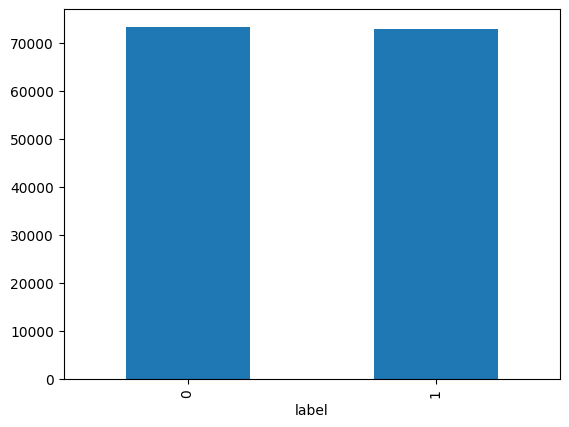

In [3]:
import pickle
import pandas as ps
import matplotlib.pyplot as mp
import numpy as np
import re
import urllib.request
from konlpy.tag import Mecab
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter


#데이터 로드하기
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
train=ps.read_table('ratings_train.txt')
test=ps.read_table('ratings_test.txt')
print(len(train))
print(len(test))

train[:5]
test[:5]

#데이터 정제하기
print(train['document'].nunique(),train['label'].nunique())
'''
아래 method는 모두 찾고자 하는 데이터 뒤에 .unique()와 같이 붙여주면 된다.
1.unique()
- unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수
2.nunique()
- nunique()는 데이터에 고유값들의 수를 출력해주는 함수
3.value_counts()
- value_counts()는 값별로 데이터의 수를 출력해주는 함수
 추가적으로 value_counts()는 기본적으로 내림차순으로 정렬이다. 
'''
train.drop_duplicates(subset=['document'],inplace=True) # document 열의 중복 제거
'''
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
subset : 중복값을 검사할 열 입니다. 기본적으로 모든 열을 검사합니다.
keep : {first / last} 중복제거를할때 남길 행입니다. first면 첫값을 남기고 last면 마지막 값을 남깁니다.
inplace : 원본을 변경할지의 여부입니다.
ignore_index : 원래 index를 무시할지 여부입니다. True일 경우 0,1,2, ... , n으로 부여됩니다.
'''
print(len(train))
train['label'].value_counts().plot(kind='bar')
print(train.groupby('label').size().reset_index(name='count'))

print(train.isnull().values.any())

print(train.isnull().sum())

print(train.loc[train.document.isnull()])

train=train.dropna(how='any') #Null 값이 존재하는 행 제거
print(train.isnull().values.any())# Null 값이 존재하는지 확인

en_text='do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub('[^a-zA-Z]',' ',en_text))  #알파벳과 공백을 제외하고 모두 제거

train['document']=train['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')# 한글과 공백을 제외하고 모두 제거

train[:5]

train['document']=train['document'].str.replace('^+','')# white space 데이터를 empty value로 변경
train['document'].replace('',np.nan, inplace=True)

print(train.isnull().sum())

train.loc[train.document.isnull()][:5]

train=train.dropna(how='any')
print(train)

test.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test['document'] = test['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test = test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test))


In [4]:
#토큰화
from konlpy.tag import Okt
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
mecab=Mecab()
okt=Okt()
mecab.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔')

x_train=[]
for sentence in tqdm(train['document']):
    tokenize=mecab.morphs(sentence)
    stop_sentence=[word for word in tokenize if not word in stopwords]
    x_train.append(stop_sentence) 

print(x_train)

x_test=[]
for sentence in tqdm(test['document']):
    #tokenize=okt.morphs(sentence,stem=True)
    tokenize=okt.morphs(sentence,stem=True) 
    stop_sentence=[word for word in tokenize if not word in stopwords]
    x_test.append(stop_sentence)

print(x_test)

100%|████████████████████████████████| 146182/146182 [00:04<00:00, 32847.86it/s]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████| 49157/49157 [00:58<00:00, 836.22it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




# 학습 데이터, 검증 데이터, 테스트 데이터
이미 학습 데이터와 테스트 데이터는 준비되었지만 학습하는 동안의 성능 평가를 진행할 검증 데이터가 추가로 필요합니다. 데이터프레임의 레이블 열을 별도로 분리하여 y_train과 y_test로 저장해줍니다. 이제 학습 데이터는 X_train, y_train에 저장되고, 테스트 데이터는 X_test, y_test에 저장이 될 것입니다.

학습 데이터 중에서 20%를 분할하여 추가로 검증 데이터를 만들어줍니다. 머신 러닝 문제를 풀 때, 데이터의 분리는 주로 사이킷런에서 제공하는 train_test_split을 사용해 진행합니다. test_size에 비율을 넣어주면 기존 데이터에 대해서 해당 비율만큼 일부 데이터를 분할하여 반환합니다.

랜덤으로 분할하는 과정에서 레이블 불균형이 발생하지 않도록, 레이블의 균형 비율을 유지하면서 분할하고 싶다면 분할 시 기존 데이터의 y데이터를 stratify의 값으로 사용하면 됩니다.

In [5]:
#jupyter에선 에러
y_train=np.array(train['label'])
y_test=np.array(test['label'])

x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2,random_state=0,stratify=y_train)
print('--------학습 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_train==0)/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_train)/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_valid==0)/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_valid)/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_test==0)/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_test)/len(y_test) * 100,3)}%')

--------학습 데이터의 비율-----------
부정 리뷰 = 50.171%
긍정 리뷰 = 49.829%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.173%
긍정 리뷰 = 49.827%
--------테스트 데이터의 비율-----------
부정 리뷰 = 49.73%
긍정 리뷰 = 50.27%


In [6]:
#단어 집합 만들기
word_list=[]
for sent in x_train:
    for word in sent:
        word_list.append(word)

word_count=Counter(word_list)
print(word_count)


print(word_count['영화'])
print(word_count['공감'])

vocab=sorted(word_count, key=word_count.get,reverse=True)
print(vocab)

threshold=3
total_cnt=len(word_count)# 단어의 수
rera_cnt=0# 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq=0# 훈련 데이터의 전체 단어 빈도수 총 합
rera_freq=0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


for key,value in word_count.items():   # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    total_freq=total_freq+value   
    if (value<threshold): # 단어의 등장 빈도수가 threshold보다 작으면
        rera_cnt=rera_cnt+1
        rera_freq=rera_freq+value


print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rera_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rera_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rera_freq / total_freq)*100)


vocab_size=total_cnt-rera_cnt
vocab=vocab[:vocab_size]
print(len(vocab))

word_index={}
word_index['<pad>']=1
word_index['<unk>']=0

for index,word in enumerate(vocab):
    word_index[word]=index+2


vocab_size=len(word_index)
print(vocab_size)

print('단어 <PAD>와 맵핑되는 정수 :', word_index['<pad>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_index['<unk>'])
print('단어 영화와 맵핑되는 정수 :', word_index['영화'])

Counter({'.': 127067, '영화': 45716, '보': 20088, '..': 17954, ',': 17641, '!': 15440, '있': 13337, '없': 12716, '?': 12305, '좋': 10919, '나': 10206, '었': 9739, '만': 9428, '는데': 9156, '너무': 8794, '봤': 8206, '적': 8074, '안': 7984, '로': 7946, '정말': 7806, '음': 7470, '으로': 7423, '것': 7396, '아': 7310, '네요': 7136, '어': 7073, '재밌': 6994, '같': 6892, '점': 6751, '지만': 6695, '진짜': 6646, '했': 6504, '에서': 6387, '기': 6365, '거': 6135, '않': 6120, '았': 6045, '수': 6035, '되': 5924, '면': 5836, 'ㅋㅋ': 5794, '말': 5496, '연기': 5488, '잘': 5296, '주': 5271, '~': 5105, '내': 5090, '최고': 5084, '평점': 4985, '이런': 4823, '던': 4692, '어요': 4597, '왜': 4463, '할': 4447, '겠': 4405, '스토리': 4338, '해': 4335, '1': 4285, '습니다': 4267, '...': 4226, 'ㅋㅋㅋ': 4199, '더': 4119, '생각': 4114, '드라마': 4102, '아니': 4097, '그': 4056, '싶': 4017, '사람': 3998, '때': 3842, '감동': 3829, '배우': 3724, '함': 3722, '본': 3674, '까지': 3584, '좀': 3524, '뭐': 3448, '알': 3438, '만들': 3429, '보다': 3426, '감독': 3379, '라': 3361, '볼': 3357, '내용': 3333, '그냥': 3281, '시간': 3208, '재미':

In [7]:
#정수 인코딩
def tts(token_x,word_index):
    encoder=[]
    for sent in token_x:
        index_seq=[]
        for word in sent:
            try:
                index_seq.append(word_index[word])
            except KeyError:
                index_seq.append(word_index['<unk>'])
        encoder.append(index_seq)
    return encoder


encoder_train=tts(x_train,word_index)
encoder_vaild=tts(x_valid,word_index)
encoder_test=tts(x_test,word_index)

for sent in encoder_train[:2]:
    print(sent)


index_word=[]
for key,value in word_index.items():
    index_word[value]=key


decoded=[index_word[word] for word in encoder_train[0]]
print('기존의 첫번째 샘플 :', x_train[0])
print('복원된 첫번째 샘플 :', decoded)



[12439, 3276, 29, 249, 209, 9356, 334, 11, 38, 2, 3605, 8107, 587, 294, 1068, 3955, 142, 9, 1178, 214, 1461, 770, 456, 2, 977, 20, 558, 57, 21, 1223, 382, 101, 683, 254, 3, 2, 343, 294, 142, 14, 2407, 380, 3606, 735, 101, 236]
[5772, 1685, 25, 319, 35, 188, 0, 611, 49, 2]


IndexError: list assignment index out of range

In [ ]:
# 패딩

print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

def btl(max_len,nest_list):
    count=0
    for sentense in nest_list:
        if (len(sentence)<=max_len):
            count=count+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nest_list))*100))


max_len=30
btl(max_len,x_train)

def pad_seq(sentence,max_len):
    feature=np.zeros(len(sentence),max_len,dtype=int)
    for index,sentence in enumerate(sentence):
        if len(sentence)!=0:
            feature[index,:len(sentence)]=np.array(sentence)[:max_len]
    return feature

pad_train=pad_seq(encoder_train,max_len=max_len)
pad_valid=pad_seq(encoder_valid,max_len=max_len)
pad_test=pad_seq(encoder_test,max_len=max_len)

print('훈련 데이터의 크기 :', padded_train.shape)
print('검증 데이터의 크기 :', padded_valid.shape)
print('테스트 데이터의 크기 :', padded_test.shape)

print('첫번째 샘플의 길이 :', len(padded_X_train[0]))
print('첫번째 샘플 :', padded_X_train[0])


In [ ]:
#  LSTM을 이용한 네이버 영화 리뷰 분류 모델
import torch
import torch.nn as nn
import torch.nn.functional as F

cuda=torch.cuda.is_available()
device=torch.device('cuda'if cuda else 'cpu')
print(f'{device}mode')

In [ ]:
train_tensor=torch.tensor(np.array(y_train))
valid_tensor=torch.tensor(np.array(y_valid))
test_tensor=torch.tensor(np.array(y_test))
print(train_tensor[:5])

class tc(nn.Module):
    def __init__(self,vocab_size,embadding_dim,hidden_size,output_dim):
        super(tc,self).__init__()
        self.embedding=nn.Embedding(vocab_size,embedding_dim)
        self.lstm=nn.LSTM(embedding_dim,hidden_dim,batch_first=True)
        self.fc=nn.Linear(hidden_dim,output_dim)
    def forward(x,self):
        embedding=self.embedding(x)
        lstm_out,(hidden,cell)=self.lstm(embedding)
        last_hidden=hidden.squeeze(0)
        logit=self.fc(last_hidden)
        return logit

encode_train=torch.tensor(pad_train).to(torch.int64)
train_dataset=torch.utlis.data.TensorDataset(encode_train,train_tensor)
train_loader=torch.utilis.data.TensorDataLoader(train_dataset,shuffle=True,batch_size=32)

encoder_test=torch.tensor(pad_test).to(torch.int64)
test_dataset=torch.utils.data.TensorDataset(encode_test,test_tonsor)
test_loader=torch.utils.data.TensorDataLoader(test_dateset,shuffle=True,batch_size=1)

encoder_valid=torch.tensor(pad_valid).to(torch.int64)
valid_dataset=torch.utils.data.TensorDataset(encoder_valid,valid_tonsor)
valid_loader=torch.utils.data.TensorDataLoader(valid_dataset,shuffle=True,batch_size=1)

total_batch=len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

emdedding_dim=100
hidden_dim=128
output_dim=2
lr=0.01
num_epochs=10

model=tc(vocab_size,embedding_dim,hidden_dim,output_dim)
model.to(device)

criter=nn.CrossEntropyLoss()
opt=torch.optim.Adam(model.parameters(),lr=0.001)


In [ ]:
#평가 코드 작성
def accurate(logits,labels):
    predict=torch.amx(olgits,dim=1)
    correct=(predict==ladels).sum().item()
    total=labels.size(0)
    accurate=correct/total
    return accurate
def evaluate(model,valid_loader,criter,device):
    val_loss=0
    val_correct=0
    val_total=0

    mdoel.eval()
    with torch.no_grad():
        for match_x,batch_y in valid_loader:
            batch_x,batch_y=batch_x.to(device),batch_y.to(device)
            logits=model(batch_x)
            loss=criter(logit,batch_y)
            val_loss += loss.item()
            val_correct += accurate(logits,batch_y)*batch_t.size(0)

    val_accurate=val_correct/val_total
    val_loss /= len(valid_loader)
    return val_loss,val_accurate



In [ ]:
#학습
num_epochs=5
best_loss=float('inf')

for epoch in range(num_epochs):
    train_loss=0
    train_correct=0
    train_total=0
    model.train()
    for batch_x,batch_y in train_loader:
        batch_x,batch_y=batch_x.to(device),batch_y.to(device)
        logits=model(batch_x)
        loss=criter(logits,batch_y)
        opt.zero_grad()
        loss.backword()
        opt.step()

        train_loss +=loss.item()
        train_correct=accurate(logits,batch_y)*batch_y.size(0)
        train_total=batch_y.size(0)

    train_acc=train_accurate/train_total
    train_loss/=len(train_loader)
    val_loss,val_accurate=evaluate(model,valid_loader,criter,device)
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accurace:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accurace:.4f}')

    if val_loss<best_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_loss=val_loss
        torch.save(model.state_dict(),'best_model_checkpoint.pth')


In [ ]:
#모델 로드 및 평가

model.load_state_dic(torch.load('best_model_checkpoint.pth'))
model.to(device)

val_loss,val_accurate=evaluate(model,valid_loader,criter,device)
print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

test_loss,test_acc=evaluate(model,test_loader, criter,device)
print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')



In [ ]:
# 모델 테스트
index_tag={0 : '부정', 1 : '긍정'}

def predict(text,model,word_index,index_tag):
    model.eval()
    tokens=mecab.morphs(text)
    tokens[word for word in tokena if not stopwords]
    token_indice=[word_index.get(token,1)for tokens]
    input_tensor=torch.tensor([token_indice],dtpye=torch.long).to(device)
    with torch.no_grad():
        logits=model(input_tensor)

    predict_index=torch.argmax(logits,dim=1)
    predict_tag=index_tag[]

# GRU를 이용한 IMDB 리뷰 분류하기

In [35]:
#데이터 로드 및 단어 토큰화
import pandas as ps
import numpy as np
import matplotlib.pyplot as mp
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

nltk.download('punkt')
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")
df=ps.read_csv('IMDB Dataset.csv')
df



[nltk_data] Downloading package punkt to /home/eternal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [67]:
df.info()

print(df.isnull().values.any()) #.isnull().values.any()를 사용하여 결측값 여부를 확인합니다.


df['sentiment'].value_counts().plot(kind='bar')
print(df.groupby('sentiment').size().reset_index(name='count'))

df=df['sentiment'].replace(['positive','negative'],[1,0])

df.head()



<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
False


KeyError: 'sentiment'

In [72]:
x_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(x_data)))
print('레이블의 개수: {}'.format(len(y_data)))


x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.5,random_state=0,stratify=y_data)
                                               
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=2,random_state=0,stratify=y_train)

KeyError: 'review'

In [ ]:
#

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
nltk.download('punkt')
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")
df = pd.read_csv('IMDB Dataset.csv')
df


[nltk_data] Downloading package punkt to /home/eternal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
결측값 여부 : False
레이블 개수
  sentiment  count
0  negative  25000
1  positive  25000


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


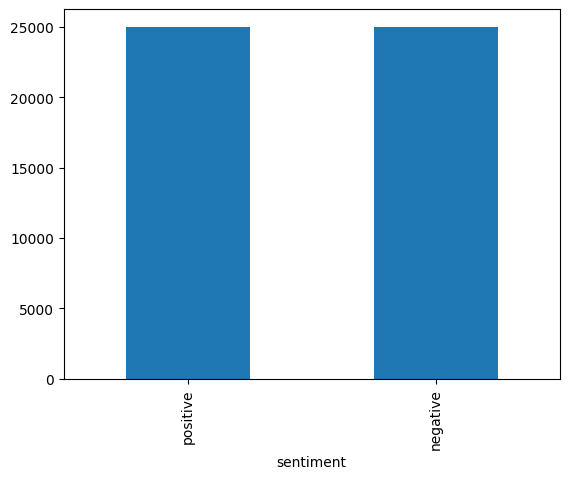

In [74]:
df.info()
print('결측값 여부 :',df.isnull().values.any())
df['sentiment'].value_counts().plot(kind='bar')
print('레이블 개수')
print(df.groupby('sentiment').size().reset_index(name='count'))
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])
df.head()


In [75]:
X_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')


영화 리뷰의 개수: 50000
레이블의 개수: 50000
--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [83]:
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent)
    tokenized_sent = [word.lower() for word in tokenized_sent]
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)


100%|███████████████████████████████████| 25000/25000 [00:14<00:00, 1697.64it/s]

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

In [96]:
# Vocab 만들기
word_list=[]
for sent in tokenized_X_train:
    for word in sent :
        word_list.append(word)

word_count=Counter(word_list)
print(len(word_count))
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_count['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_count['love'])

vocab=sorted(word_count,key=word_count.get, reverse=True)
print(vocab[:20])

threshould=3
total_cnt=len(word_count)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in word_count.items():
    total_freq=total_cnt+value
    if(value<threshould):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

vocab_size=total_cnt-rare_cnt
vocab=vocab[:vocab_size]
print(len(vocab))

word_index={}
word_index['<pad>']=1
word_index['<unk>']=0

for index,word in enumerate(vocab):
    word_index[word]=index+2

vocab_size=len(word_index)
print(vocab_size)

100586
훈련 데이터에서의 단어 the의 등장 횟수 : 265697
훈련 데이터에서의 단어 love의 등장 횟수 : 4984
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>', '<', 'br', 'it', 'in', 'i', 'this', 'that', "'s", 'was', 'as']
단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수: 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 73.80078936641911
38709
38711


In [107]:
#정수 인코딩
def tts(tokenize_data,word_index):
    encoder_data=[]
    for sent in tokenize_data:
        index_seq=[]
        for word in sent:
            try:
                index_seq.append(word_index[word])
            except:
                index_seq.append(word_index['<unk>'])
        encoder_data.append(index_seq)
    return encoder_data


encoder_train=tts(tokenized_X_train,word_index)
encoder_valid=tts(tokenized_X_valid,word_index)
encoder_test=tts(tokenized_X_test,word_index)

for sent in encoder_train[:2]:
    print(sent)

index_word={}
for key,value in word_index.items():
    index_word[value]=key

decode_sample=[index_word[word] for word in encoder_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decode_sample)

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 0, 32, 6, 2669, 9, 2, 416, 0, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.1958


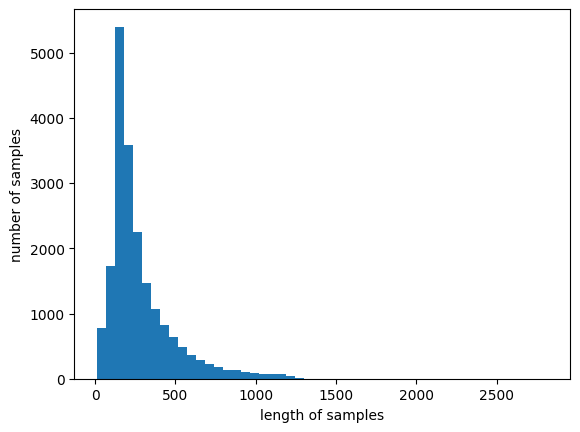

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.795
훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


In [117]:
#패딩

print('리뷰의 최대 길이 :',max(len(review) for review in encoder_train))
prnt('리뷰의 평균 길이 :',sum(map(len, encoder_train))/len(encoder_train))
plt.hist([len(review) for review in encoder_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

def btl(max_len,nest_list):
    count=0
    for sentence in nest_list:
        if (len(sentence)<=max_len):
            count=count+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nest_list))*100))

max_len=500
btl(max_len,encoder_train)

def pad_seq(sentence,max_len):
    feature=np.zeros((len(sentence),max_len),dtype=int)
    for index,sentence in enumerate(sentence):
        if len(sentence)!=0:
           feature[index,:len(sentence)]=np.array(sentence)[:max_len]
    return feature

pad_train=pad_seq(encoder_train,max_len=max_len)
pad_valid=pad_seq(encoder_valid,max_len=max_len)
pad_test=pad_seq(encoder_test,max_len=max_len)

print('훈련 데이터의 크기 :', pad_train.shape)
print('검증 데이터의 크기 :', pad_valid.shape)
print('테스트 데이터의 크기 :', pad_test.shape)

In [162]:
#모델링
import torch
import torch.nn as nn
import torch.optim as opt
import torch.functional as F

use=torch.cuda.is_available()
device=torch.device('cuda'if use else 'cpu')
print(f'{device} mode')

train_tensor=torch.tensor(np.array(y_train))
valid_tensor=torch.tensor(np.array(y_valid))
test_tensor=torch.tensor(np.array(y_test))

print(train_tensor[:5])
print(valid_tensor[:5])
print(test_tensor[:5])

class tc(nn.Module):
    def __init__(self,vocab_size,embedding_dim,hidden_dim,output_dim):
        super(tc,self).__init__()
        self.embedding=nn.Embedding(vocab_size,embedding_dim)
        self.gru=nn.GRU(embedding_dim,hidden_dim,batch_first=True)
        self.fc=nn.Linear(hidden_dim,output_dim)
    def forword(self,x):
        embedding=self.embedding(x)
        gru_out,hidden=self.gru(embadding)
        last_hidden=hidden.squeeze(0)
        logits=self.fc(last_hidden)
        return logits

encoder_train=torch.tensor(pad_train).to(torch.int64)
train_dataset=torch.utils.data.TensorDataset(encoder_train,train_tensor)
train_loader=torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=1)


encoder_valid=torch.tensor(pad_valid).to(torch.int64)
valid_dataset=torch.utils.data.TensorDataset(encoder_valid,valid_tensor)
valid_loader=torch.utils.data.DataLoader(valid_dataset,shuffle=True,batch_size=1)

total_batch=len(train_loader)
print(total_batch)

embedding_dim=1000
hidden_dim=256
output_dim=2
lr=0.001
num_spochs=1000

#model=tc(vocab_size,embedding_dim,hidden_dim,output_dim)
model=tc(vocab_size,embedding_dim,hidden_dim,output_dim)

model.to(device)
criter=nn.CrossEntropyLoss()
opt=torch.optim.Adam(model.parameters(),lr=0.001)



cuda mode
tensor([1, 1, 0, 0, 0])
tensor([1, 0, 1, 0, 0])
tensor([0, 0, 0, 1, 1])
20000


In [163]:
#평가 코드 작성
def acc(logits,labels):
    predict=torch.argmax(logits,dim=1)
    correct=(predict==labels).sum().item()
    total=lables.size(0)
    accurate=correct/total
    return accurate


def eval(model,vaild_loader,criter,device):
    val_loss=0
    val_correct=0
    val_total=0
    mdoel.eval()
    with torch.noo_grad():
        for batch_x,batch_y in vaild_loader:
            batch_x,batch_y=batch_x.to(device),batch_y.to(device)
            logits=model(batch_x)
            loss=criter(logits,batch_y)
            val_loss+=loss.item()
            val_correct+=acc(logits,batch_y)*batch.size(0)
            val_total+=batch_y.size(0)

    val_accurate=val_correct/val_total
    val_loss/=len(valid_loader)
    return val_loss,val_accurate

In [167]:
#학습

num_epochs=10
best_loss=float('inf')

for epoch in range(num_epochs):
    train_loss=0
    train_correct=0
    train_total=0
    model.train()
    for batch_x,batch_y in train_loader:
        batch_x,batch_y=batch_x.to(device),batch_y.to(device)
        logits=model(batch_x)
        loss=criter(logits,batch_y)        
        opt.zero_grad()
        loss.backward()
        opt.step()
        train_loss+=loss.item()
        train_correct+=acc(logits,batch_y)*batch_y.size(0)
        train_total+=batch_y.size(0)
    train_accurate=train_correct/train
    train_loss/=len(train_loader)
    val_loss,val_accurate=eval(model,valid_loader,criter,device)
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
    if val_loss<best_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

NotImplementedError: Module [tc] is missing the required "forward" function

In [169]:
#모델 로드 및 평가
model.load_state_dict(torch.load('best_model_checkpoint.pth'))
model.to(device)

val_loss,val_accurate(model,valid_loader,criter,device)
print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')


FileNotFoundError: [Errno 2] No such file or directory: 'best_model_checkpoint.pth'

#모델 테스트
index_tag={0 : '부정', 1 : '긍정'}

def predict(text,model,word_index,index_tag):
    model.eval()
    tokens=word_tokenize(text)
    token_indices=[word_index.get(token.lower(),1)for token in tokens]
    input_tensor=torch.tensor([token_indices],dtype=torch.long).to(device)
    with torch.no_grad():
        logits=model(input_tensor)
        pridict_index=torch.max(logits,dim=1)
        pridict_tag=index_tag[predict_index.item()]
        return predict_tag

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)


# 자연어 처리를 위한 1D CNN(1D Convolutional Neural Networks)
합성곱 신경망을 자연어 처리에서 사용하기 위한 1D CNN을 이해해보겠습니다.

### 2D 합성곱(2D Convolutions) ###
앞서 합성곱 신경망을 설명하며 합성곱 연산을 다음과 같이 정의했습니다.

합성곱 연산이란 커널(kernel) 또는 필터(filter) 라는 n × m 크기의 행렬로 높이(height) × 너비(width) 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 n × m 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말합니다. 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 훑습니다.
위와 같은 이미지 처리에서의 합성곱 연산을 2D 합성곱 연산이라고 부릅니다.

### 1D 합성곱(1D Convolutions) ###
자연어 처리에 사용되는 1D 합성곱 연산을 정리해봅시다. LSTM을 이용한 여러 실습을 상기해보면, 각 문장은 임베딩 층(embedding layer)을 지나서 각 단어가 임베딩 벡터가 된 상태로 LSTM의 입력이 되었습니다. 이는 1D 합성곱 연산에서도 마찬가지입니다. 1D 합성곱 연산에서도 입력이 되는 것은 각 단어가 벡터로 변환된 문장 행렬로 LSTM과 입력을 받는 형태는 동일합니다.

'wait for the video and don't rent it'이라는 문장이 있을 때, 이 문장이 토큰화, 패딩, 임베딩 층(Embedding layer)을 거친다면 다음과 같은 문장 형태의 행렬로 변환될 것입니다. 아래 그림에서 n은 문장의 길이, k
는 임베딩 벡터의 차원입니다.

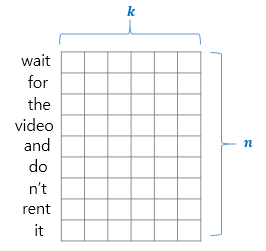

그리고 이 행렬이 만약 LSTM의 입력으로 주어진다면, LSTM은 첫번째 시점에는 첫번째 행을 입력으로 받고, 두번째 시점에는 두번째 행을 입력으로 받으며 순차적으로 단어를 처리합니다. 그렇다면 1D 합성곱 연산의 경우에는 저 행렬을 어떻게 처리할까요?

1D 합성곱 연산에서 커널의 너비는 문장 행렬에서의 임베딩 벡터의 차원과 동일하게 설정됩니다. 그렇기 때문에 1D 합성곱 연산에서는 커널의 높이만으로 해당 커널의 크기라고 간주합니다. 가령, 커널의 크기가 2인 경우에는 아래의 그림과 같이 높이가 2, 너비가 임베딩 벡터의 차원인 커널이 사용됩니다.

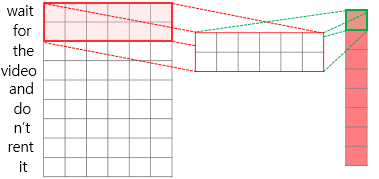

커널의 너비가 임베딩 벡터의 차원이라는 의미는 커널이 2D 합성곱 연산때와는 달리 너비 방향으로는 더 이상 움직일 곳이 없다는 것을 의미합니다. 그래서 1D 합성곱 연산에서는 커널이 문장 행렬의 높이 방향으로만 움직이게 되어있습니다. 쉽게 설명하면, 위 그림에서 커널은 2D 합성곱 연산때와는 달리 오른쪽으로는 움직일 공간이 없으므로, 아래쪽으로만 이동해야 합니다.

한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 표현한 이미지는 다음과 같습니다. 크기가 2인 커널은 처음에는 'wait for'에 대해서 합성곱 연산을 하고, 두번째 스텝에는 'for the'에 대해서 연산을, 세번째 스텝에는 'the video'에 대해서 연산을, 네번째 스텝에서는 'video and'에 대해서 연산을 하게 됩니다.

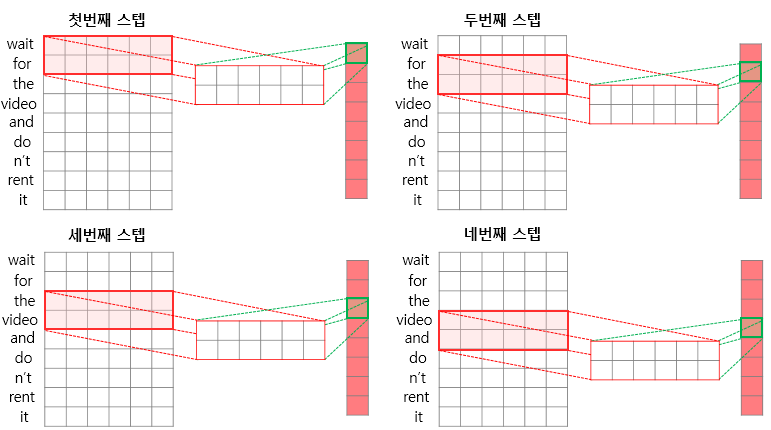

이렇게 여덟번째 스텝까지 반복하였을 때, 결과적으로는 우측의 8차원 벡터를 1D 합성곱 연산의 결과로서 얻게될 것입니다. 그런데 커널의 크기가 꼭 2일 필요가 있을까요? 2D 합성곱 연산에서 커널의 크기가 3 × 3 또는 5 × 5 또는 등등의 여러 크기의 커널을 자유자재로 사용할 수 있었듯이, 1D 합성곱 연산에서도 커널의 크기는 사용자가 변경할 수 있습니다. 가령, 커널의 크기를 3으로 한다면, 네번째 스텝에서의 연산은 아래의 그림과 같을 것입니다.

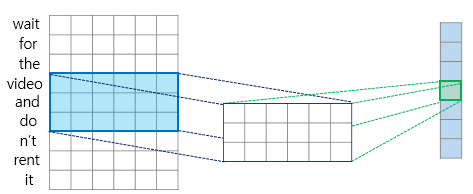

커널의 크기가 달라진다는 것은 어떤 의미가 있을까요? CNN에서의 커널은 신경망 관점에서는 가중치 행렬이므로 커널의 크기에 따라 학습하게 되는 파라미터의 수는 달라집니다. 1D 합성곱 연산과 자연어 처리 관점에서는 커널의 크기에 따라서 참고하는 단어의 묶음의 크기가 달라집니다. 이는 참고하는 n-gram이 달라진다고 볼 수 있습니다. 커널의 크기가 2라면 각 연산의 스텝에서 참고하는 것은 bigram입니다. 커널의 크기가 3이라면 각 연산의 스텝에서 참고하는 것은 trigram입니다.

### 맥스 풀링(Max-pooling) ###

이미지 처리에서의 CNN에서 그랬듯이, 일반적으로 1D 합성곱 연산을 사용하는 1D CNN에서도 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하게됩니다. 그 중 대표적으로 사용되는 것이 맥스 풀링(Max-pooling)입니다. 맥스 풀링은 각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산입니다.

아래의 그림은 크기가 2인 커널과 크기가 3인 커널 두 개의 커널로부터 각각 결과 벡터를 얻고, 각 벡터에서 가장 큰 값을 꺼내오는 맥스 풀링 연산을 보여줍니다.

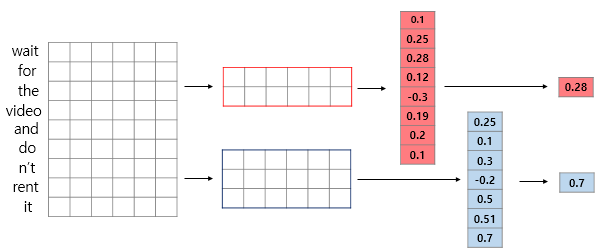

### 신경망 설계하기 ###

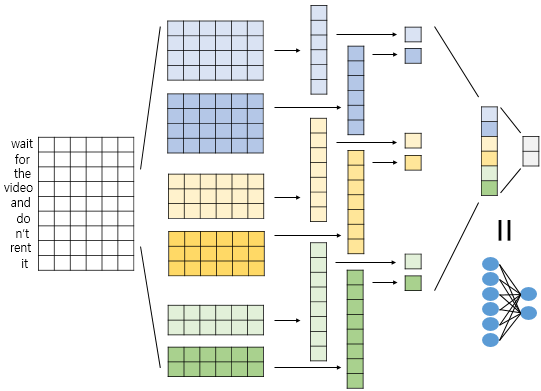

커널은 크기가 4인 커널 2개, 3인 커널 2개, 2인 커널 2개를 사용합니다. 문장의 길이가 9인 경우, 합성곱 연산을 한 후에는 각각 6차원 벡터 2개, 7차원 벡터 2개, 8차원 벡터 2개를 얻습니다. 벡터가 6개므로 맥스 풀링을 한 후에는 6개의 스칼라 값을 얻는데, 일반적으로 이렇게 얻은 스칼라값들은 전부 연결(concatenate)하여 하나의 벡터로 만들어줍니다. 이렇게 얻은 벡터는 1D CNN을 통해서 문장으로부터 얻은 벡터입니다. 이를 뉴런이 2개인 출력층에 완전 연결시키므로서(nn.Linear()를 사용) 텍스트 분류를 수행합니다.

# CNN을 이용한 IMDB 리뷰 분류

[nltk_data] Downloading package punkt to /home/eternal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
False
  sentiment  count
0  negative  25000
1  positive  25000
50000
50000
--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


100%|███████████████████████████████████| 25000/25000 [00:13<00:00, 1830.10it/s]

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

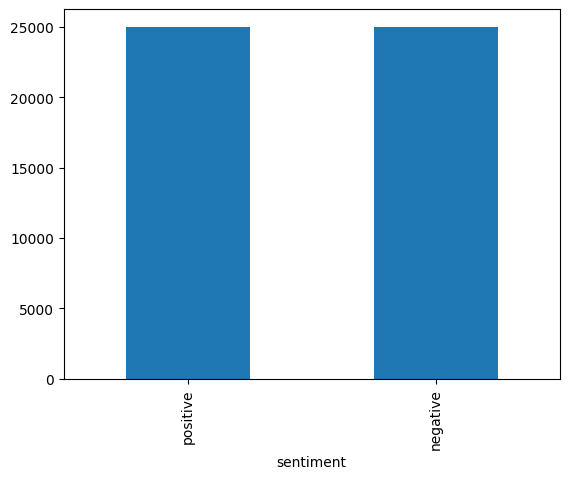

In [186]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as mp
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

nltk.download('punkt')
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")
df=ps.read_csv('IMDB Dataset.csv')
df

df.info()
print(df.isnull().values.any())
df['sentiment'].value_counts().plot(kind='bar')
print(df.groupby('sentiment').size().reset_index(name='count'))

df['sentiment']=df['sentiment'].replace(['positive','negative'],[1, 0])
df[:5]

x_data=df['review']
y_data=df['sentiment']
print(len(x_data))
print(len(y_data))

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.5,random_state=0,stratify=y_data)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=2,random_state=0,stratify=y_train)

print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

def tokenize(sentence):
    tokenize_sentence=[]
    for sent in tqdm(sentence):
        tokenize_sent=word_tokenize(sent)
        tokenize_sent=[word.lower()for word in tokenize_sent]
        tokenize_sentence.append(tokenize_sent)
    return tokenize_sentence

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

for sent in tokenized_X_train[:2]:
    print(sent)

In [197]:
#Vocab 만들기

word_list=[]
for sent in tokenized_X_train:
    for word in sent:
        word_list.append(word)

word_count=Counter(word_list)
print(len(word_count))
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_count['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_count['love'])


vocab=sorted(word_count,key=word_count.get,reverse=True)
print(vocab[:10])

threshold=3
total_cnt=len(word_count)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in word_count.items():
    total_freq=total_freq+value
    
    if(value<threshold):
        rare_cnt=rare_cnt+1
        rare_freq=rare_freq+value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

vocab_size=total_cnt
vocab=vocab[:vocab_size]
print(len(vocab))

word_index={}
word_index['<pad>']=1
word_index['<unk>']=0

for index, word in enumerate(vocab):
    word_index[word]=index+2
    
vocab_size=len(word_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)


100586
훈련 데이터에서의 단어 the의 등장 횟수 : 265697
훈련 데이터에서의 단어 love의 등장 횟수 : 4984
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']
단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수: 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3294254426463437
100586
패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 100588


In [214]:
#정수 인코딩

def tts(tokenized_X_data, word_index):
    encoded_X_data=[]
    for sent in tokenized_X_data:
        index_seq=[]
        for word in sent:
            try:
                index_seq.append(word_index[word])
            except KeyError:
                index_seq.append(word_index['<unk>'])
        encoded_X_data.append(index_seq)
    return encoded_X_data

encoded_X_train = tts(tokenized_X_train, word_index)
encoded_X_test = tts(tokenized_X_test, word_index)
encoded_X_valid = tts(tokenized_X_valid, word_index)

for sent in encoded_X_train[:2]:
    print(sent)

index_to_word = {}
for key, value in word_index.items():
    index_word[value] = key

decoded_sample = [index_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 38711, 32, 6, 2669, 9, 2, 416, 51068, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.1958


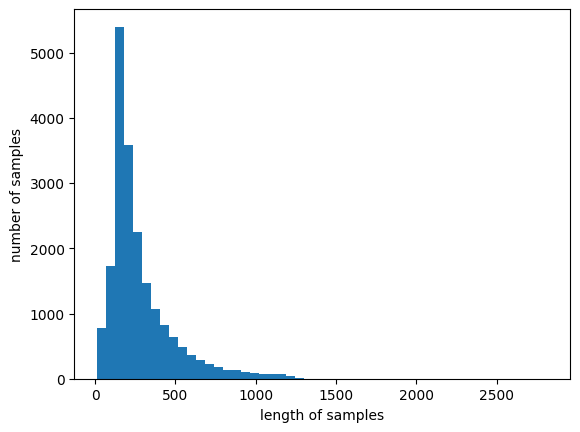

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.795
훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


In [241]:
#패딩

print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


def btl(max_len,nest_list):
    count=0
    for sentence in nest_list:
        if(len(sentence)<=max_len):
            count=count+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nest_list))*100))

max_len=500
btl(max_len,encoded_X_train)

def pad_seq(sentence,max_len):
    feature=np.zeros((len(sentence),max_len),dtype=int)
    for index,sentence in enumerate(sentence):
        if len(sentence) != 0:
            feature[index,:len(sentence)]=np.array(sentence)[:max_len]
    return feature


padded_X_train = pad_seq(encoded_X_train, max_len=max_len)
padded_X_valid = pad_seq(encoded_X_valid, max_len=max_len)
padded_X_test = pad_seq(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

In [242]:
#모델링
import torch
import torch.nn as nn
import torch.nn.functional as F

use=torch.cuda.is_available()
device=torch.device('cuda'if use else 'cpu')
print(f'{device} mode')



train_label_tensor=torch.tensor(np.array(y_train))
valid_label_tensor=torch.tensor(np.array(y_valid))
test_label_tensor=torch.tensor(np.array(y_test))
print(train_label_tensor[:5])
print(valid_label_tensor[:5])
print(test_label_tensor[:5])

input=torch.randn(32,16,50)
m=nn.Conv1d(16,33,3,stride=1)
output=m(input)
print(output.shape)


#CNN
class cnn(nn.Module):
    def __init__(self,vocab_size,num_labels):
        super(cnn,self).__init__()
        self.num_filer_size=1
        self.num_filers=256
        self.word_embed=torch.nn.Embedding(num_embeddings=vocab_size,embedding_dim=128,padding_idx=0)
        self.conv1=torch.nn.Conv1d(128,self.num_fliters,5,stride=1)
        self.dorpout=torch.nn.Dropout(0.5)
        self.fc1=torch.nn.Linear(1*self_filters,num_labels,bias=True)
    def forward(self,inputs):
        embedding=self.word_embed(inputs).permute(0,2,1)
        x=F.relu(self,conv1d(embedding).permute(0,2,1).max(1)[0])
        y_pred=self.fc1(self.dropout(x))
        return y_pred

encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))
model = CNN(vocab_size, num_labels = len(set(y_train)))
model.to(device)


cuda mode
tensor([1, 1, 1, 1, 0])
tensor([1, 0])
tensor([0, 0, 0, 1, 1])
torch.Size([32, 33, 48])


AssertionError: Size mismatch between tensors

In [ ]:
#평가 코드 작성

def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy


In [ ]:
#학습
num_ep학습ochs = 5

# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')


In [ ]:
#모델 로드 및 평가
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)
# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')


In [ ]:
#모델 테스트
index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    # 모델 평가 모드
    model.eval()

    # 토큰화 및 정수 인코딩. OOV 문제 발생 시 <UNK> 토큰에 해당하는 인덱스 1 할당
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # 리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # 모델의 예측
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # 레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)  # (1,)

    # 인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag


test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)


Defaulting to user installation because normal site-packages is not writeable


In [254]:
#사전 훈련된 임베딩을 이용한 성능 상승 시키기

import gensim
from gensim.models import word2vec



!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j" -O GoogleNews-vectors-negative300.bin.gz && rm -rf /tmp/cookies.txt
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
embedding_matrix = np.zeros((vocab_size, 300))

def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

# <PAD>를 위한 0번과 <UNK>를 위한 1번은 실제 단어가 아니므로 맵핑에서 제외
for word, i in word_to_index.items():
    if i > 2:
      temp = get_vector(word)
      if temp is not None:
          embedding_matrix[i] = temp

# <PAD>나 <UNK>의 경우는 사전 훈련된 임베딩이 들어가지 않아서 0벡터임
embedding_matrix[0]

word_to_index['apple']
# word2vec_model에서 'apple'의 임베딩 벡터
# embedding_matrix[8053]이 일치하는지 체크
np.all(word2vec_model['apple'] == embedding_matrix[8053])


--2024-01-12 04:12:50--  https://docs.google.com/uc?export=download&confirm=&id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
docs.google.com (docs.google.com) 해석 중... 142.250.76.142, 2404:6800:400a:80e::200e
다음으로 연결 중: docs.google.com (docs.google.com)|142.250.76.142|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://drive.usercontent.google.com/download?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&export=download [따라감]
--2024-01-12 04:12:51--  https://drive.usercontent.google.com/download?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&export=download
drive.usercontent.google.com (drive.usercontent.google.com) 해석 중... 142.250.76.129, 2404:6800:400a:80e::2001
다음으로 연결 중: drive.usercontent.google.com (drive.usercontent.google.com)|142.250.76.129|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 2449 (2.4K) [text/html]
저장 위치: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   2.39K  --.-KB/s    / 0s       

2024-01-12 04:12:52 (58.7 MB/s) - ‘GoogleNews-v

BadGzipFile: Not a gzipped file (b'<!')

In [256]:
#모델링

import torch
import torch.nn as nn
import torch.nn.functional as F
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

class CNN(torch.nn.Module):
  def __init__(self, vocab_size, num_labels):
    super(CNN, self).__init__()

    # 오직 하나의 종류의 필터만 사용함.
    self.num_filter_sizes = 1 # 윈도우 5짜리 1개만 사용
    self.num_filters = 256

    # 주석 처리된 코드는 기존의 임베딩 층을 사용할 경우
    # self.word_embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=128, padding_idx=0)
    self.word_embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=300)
    self.word_embed.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
    self.word_embed.weight.requires_grad = True

    # 윈도우 5짜리 1개만 사용
    self.conv1 = torch.nn.Conv1d(300, self.num_filters, 5, stride=1)
    self.dropout = torch.nn.Dropout(0.5)
    self.fc1 = torch.nn.Linear(1 * self.num_filters, num_labels, bias=True)

  def forward(self, inputs):
    # word_embed(inputs).shape == (배치 크기, 문장길이, 임베딩 벡터의 차원)
    # word_embed(inputs).permute(0, 2, 1).shape == (배치 크기, 임베딩 벡터의 차원, 문장 길이)
    embedded = self.word_embed(inputs).permute(0, 2, 1)

    # max를 이용한 maxpooling
    # conv1(embedded).shape == (배치 크기, 커널 개수, 컨볼루션 연산 결과) == ex) 32, 256, 496
    # conv1(embedded).permute(0, 2, 1).shape == (배치 크기, 컨볼루션 연산 결과, 커널 개수)
    # conv1(embedded).permute(0, 2, 1).max(1)[0]).shape == (배치 크기, 커널 개수)
    x = F.relu(self.conv1(embedded).permute(0, 2, 1).max(1)[0])

    # y_pred.shape == (배치 크기, 분류할 카테고리의 수)
    y_pred = self.fc1(self.dropout(x))

    return y_pred
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)


total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))
model = CNN(vocab_size, num_labels = len(set(y_train)))
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


cpu와 cuda 중 다음 기기로 학습함: cuda


In [ ]:
#평가 코드 작성
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy


In [ ]:
#학습
num_epochs = 5

# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')


In [ ]:
#모델 로드 및 평가
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)
# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')


In [ ]:
#index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    # 모델 평가 모드
    model.eval()

    # 토큰화 및 정수 인코딩. OOV 문제 발생 시 <UNK> 토큰에 해당하는 인덱스 1 할당
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # 리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # 모델의 예측
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # 레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)  # (1,)

    # 인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)


In [ ]:
encoded_X_train = tts(tokenized_X_train, word_index)
encoded_X_test = tts(tokenized_X_test, word_index)
encoded_X_valid = tts(tokenized_X_valid, word_index)


In [ ]:
tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)